In [18]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.color import rgb2gray
%matplotlib notebook

In [2]:
cA, cD = pywt.dwt([1, 2, 3, 4], 'db1')

In [3]:
cA

array([2.12132034, 4.94974747])

In [4]:
cD

array([-0.70710678, -0.70710678])

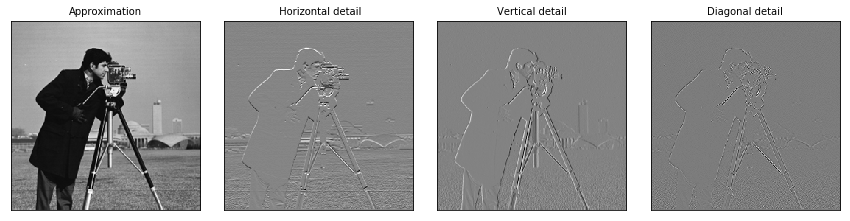

In [9]:
# Load image
original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

In [37]:
interferogram_path = "C:\\Users\\User\\Documents\\pendrive\\Sample interferograms\\s0920_17 355 nm end on interferometry (1).JPG"
interferogram = imread(interferogram_path)
interferogram = rgb2gray(interferogram)

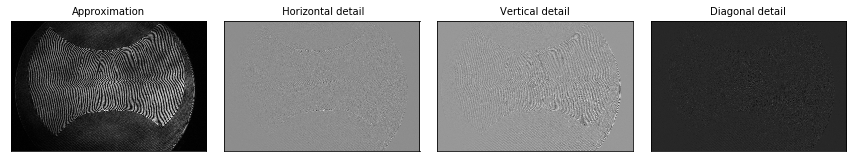

In [17]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(interferogram, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


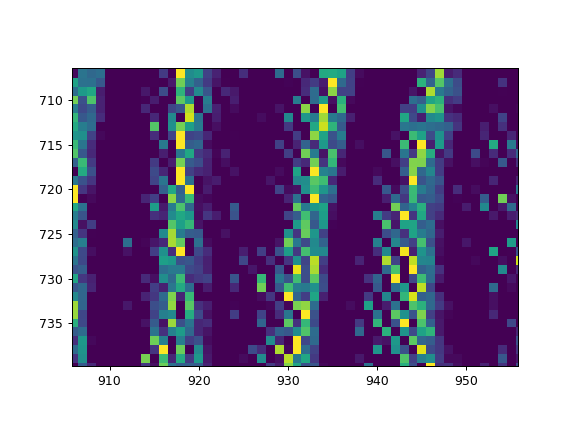

In [28]:
plt.imshow(HL, clim=[0,0.1])

In [32]:
from skimage.restoration import denoise_wavelet
interferogram = imread(interferogram_path)
im_bayes = denoise_wavelet(interferogram, multichannel=True, convert2ycbcr=True, mode='soft')

<IPython.core.display.Javascript object>


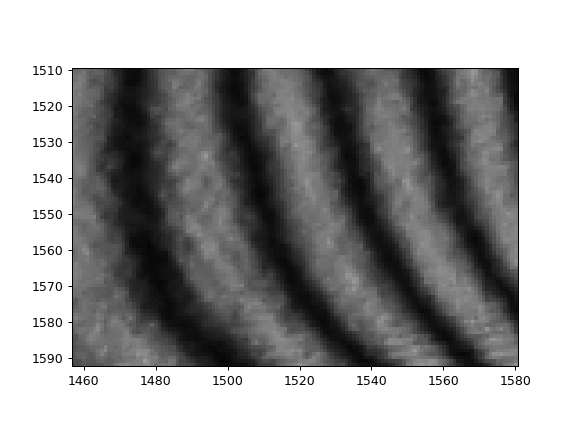

In [33]:
plt.imshow(im_bayues, clim=[0,0.1])

In [34]:
from pywt import WaveletPacket2D
import pywt.data

<IPython.core.display.Javascript object>


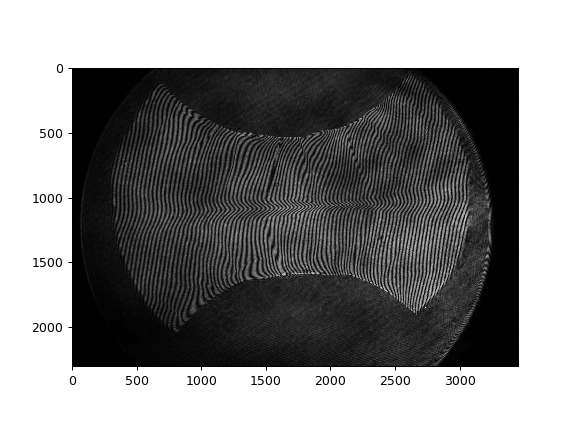

<IPython.core.display.Javascript object>


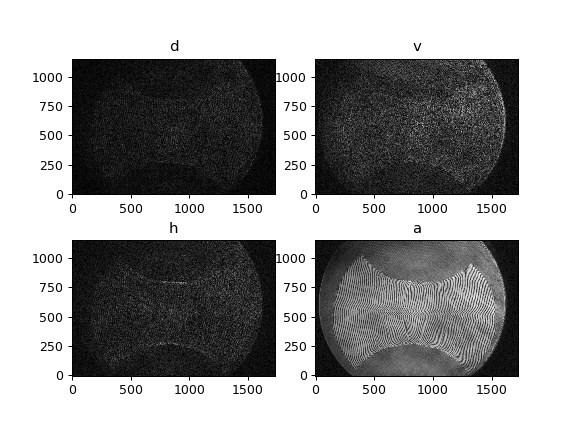

<IPython.core.display.Javascript object>


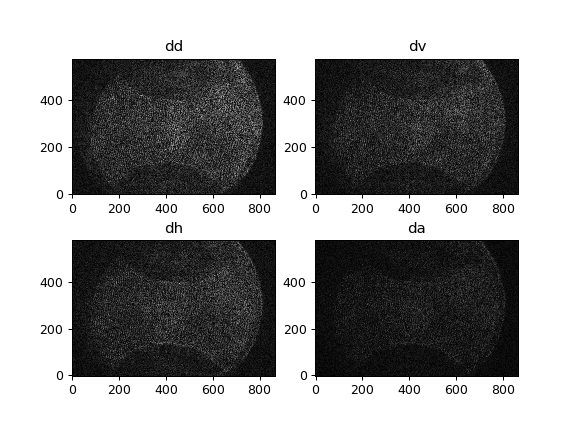

<IPython.core.display.Javascript object>


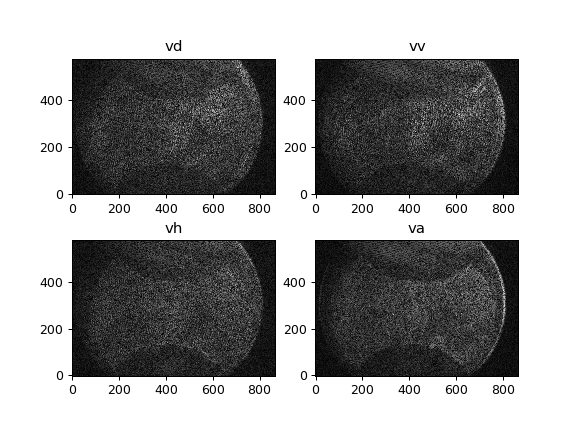

<IPython.core.display.Javascript object>


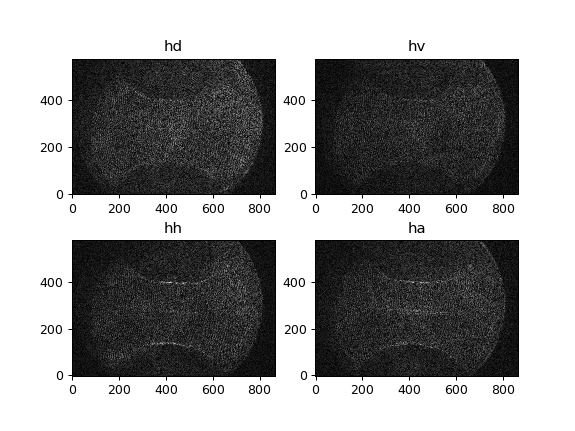

<IPython.core.display.Javascript object>


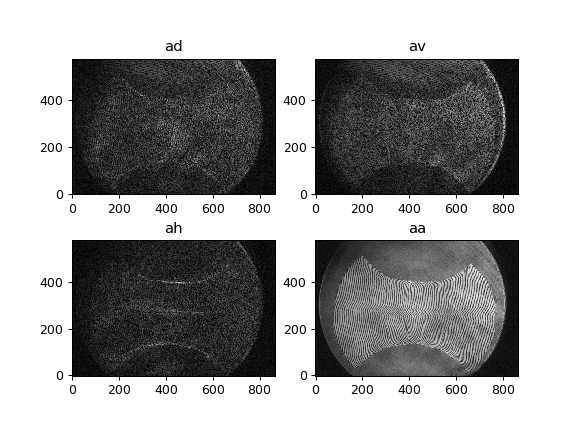

<IPython.core.display.Javascript object>


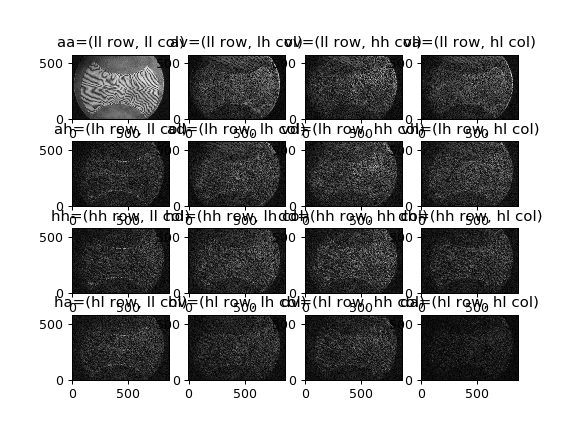

In [51]:
arr = interferogram

wp2 = WaveletPacket2D(arr, 'db2', 'symmetric', maxlevel=2)

# Show original figure
plt.imshow(arr, interpolation="nearest", cmap=plt.cm.gray)

path = ['d', 'v', 'h', 'a']

# Show level 1 nodes
fig = plt.figure()
for i, p2 in enumerate(path):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.imshow(np.sqrt(np.abs(wp2[p2].data)), origin='image',
              interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(p2)

# Show level 2 nodes
for p1 in path:
    fig = plt.figure()
    for i, p2 in enumerate(path):
        ax = fig.add_subplot(2, 2, i + 1)
        p1p2 = p1 + p2
        ax.imshow(np.sqrt(np.abs(wp2[p1p2].data)), origin='image',
                  interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(p1p2)

fig = plt.figure()
i = 1
for row in wp2.get_level(2, 'freq'):
    for node in row:
        ax = fig.add_subplot(len(row), len(row), i)
        ax.set_title("%s=(%s row, %s col)" % (
                     (node.path,) + wp2.expand_2d_path(node.path)))
        ax.imshow(np.sqrt(np.abs(node.data)), origin='image',
                  interpolation="nearest", cmap=plt.cm.gray)
        i += 1

plt.show()

In [44]:
aa = np.sqrt(np.abs(wp2[p1p2].data))

In [59]:
imsave('ii.png', interferogram)

C:\Users\User\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [56]:
np.amax(aa)

1.7012559176219224